# Homework
## Week 2
### Linear Regression
The goal of this homework is to create a regression model for predicting the car fuel efficiency (column 'fuel_efficiency_mpg').

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('car_fuel_efficiency.csv')

df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


### Preparing the dataset

In [71]:
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [72]:
df_filtered = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]

df_filtered.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


### Exploratory Data Analysis

`fuel_efficiency_mpg` does not have a long tail and is normally distributed.

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

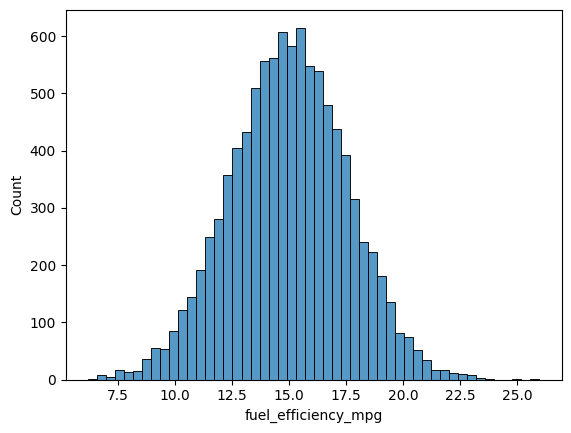

In [73]:
sns.histplot(df['fuel_efficiency_mpg'], bins=50)

### Question 1

There's one column with missing values. What is it?

In [74]:
df_filtered.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

### Question 2

What's the median (50% percentile) for variable 'horsepower'?

In [75]:
df_filtered['horsepower'].median()

np.float64(149.0)

### Prepare and split the dataset

- Shuffle the dataset (the filtered one you created above), use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures

In [76]:
n = len(df_filtered)
n_val = n_test = int(n * 0.2)
n_train = n - n_val - n_test

n, n_val + n_test + n_train

(9704, 9704)

In [77]:
n_val, n_test, n_train

(1940, 1940, 5824)

In [78]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [79]:
df_train = df_filtered.iloc[idx[:n_train]]
df_val = df_filtered.iloc[idx[n_train:n_train + n_val]]
df_test = df_filtered.iloc[idx[n_train + n_val:]]

In [80]:
# y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
# y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
# y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

In [81]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

### Question 3

- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

In [82]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

#### With 0

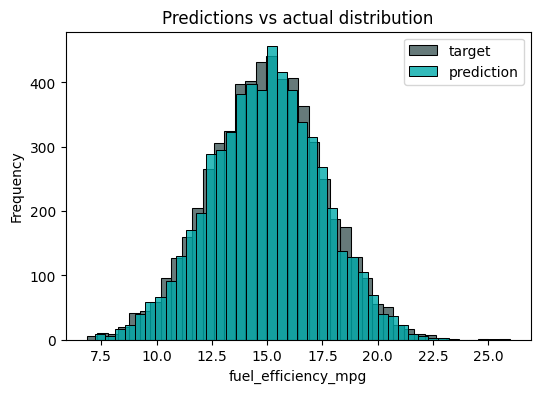

In [83]:
# df_fillwith0 = df['horsepower'].fillna(float(0))
X_train_0 = df_train.fillna(float(0)).values
w_0, w = train_linear_regression(X_train_0, y_train)

y_pred = w_0 + X_train_0.dot(w)

plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#002222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#00aaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('fuel_efficiency_mpg')
plt.title('Predictions vs actual distribution')

plt.show()

In [84]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

rmse(y_train, y_pred)

np.float64(0.5202614265099076)

In [85]:
X_val = df_val.fillna(float(0)).values
y_pred = w_0 + X_val.dot(w)

score = rmse(y_val, y_pred)
print(round(score, 2))

0.52


#### With mean

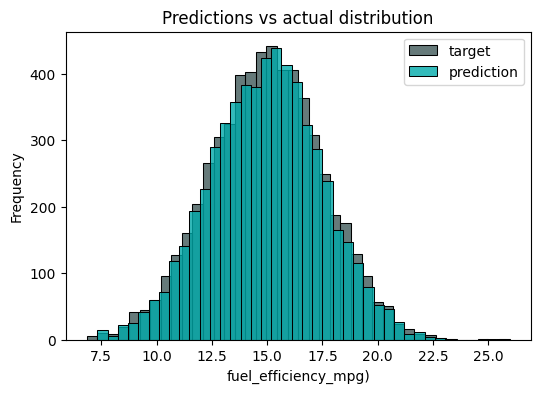

In [86]:
X_train_mean = df_train.fillna(df_train.horsepower.mean()).values
w_0, w = train_linear_regression(X_train_mean, y_train)

y_pred = w_0 + X_train_mean.dot(w)

plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#002222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#00aaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('fuel_efficiency_mpg)')
plt.title('Predictions vs actual distribution')

plt.show()

In [87]:
rmse(y_train, y_pred)

np.float64(0.46244121379599645)

In [88]:
X_val = df_val.fillna(df_train.horsepower.mean()).values
y_pred = w_0 + X_val.dot(w)

score = rmse(y_val, y_pred)
print(round(score, 2))

0.46


### Question 4
- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?

In [89]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [90]:
min_rmse = float('inf')
X_val = df_val.fillna(float(0)).values

for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train_0, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    print('%6s' %r, round(score, 2))
    
    if score < min_rmse:
        min_rmse = rmse(y_val, y_pred)
        best_r = r

# print(f"Best r: {best_r}, Best RMSE: {min_rmse}")

     0 0.52
  0.01 0.52
   0.1 0.52
     1 0.52
     5 0.52
    10 0.52
   100 0.52


Technically, the best RMSE is 0.01, but with the condition to round to the nearest 2 decimal places and select the smallest r, it is 0.

### Question 5
- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))

In [91]:
def pipeline(df_raw, seed):

    n = len(df_raw)
    n_val = n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    n, n_val + n_test + n_train

    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    df_train = df_raw.iloc[idx[:n_train]]
    df_val = df_raw.iloc[idx[n_train:n_train+n_val]]
    df_test = df_raw.iloc[idx[n_train+n_val:]]

    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values

    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']

    X_train_0 = df_train.fillna(float(0)).values
    w_0, w = train_linear_regression(X_train_0, y_train)

    y_pred = w_0 + X_train_0.dot(w)
    train_rmse = rmse(y_train, y_pred)
    # print('train:', train_rmse)

    X_val = df_val.fillna(float(0)).values
    y_pred = w_0 + X_val.dot(w)
    val_rmse = rmse(y_val, y_pred)
    # print('val:', val_rmse)

    print('Seed:', seed)
    print('Val RMSE:', val_rmse)

    return val_rmse

In [92]:
seed_list = range(10)
rmse_list = []
for seed in seed_list:
    rmse_list.append(pipeline(df_filtered, seed))

Seed: 0
Val RMSE: 0.5206531296297207
Seed: 1
Val RMSE: 0.5213388912866506
Seed: 2
Val RMSE: 0.5228069974913666
Seed: 3
Val RMSE: 0.5159516741255491
Seed: 4
Val RMSE: 0.5109129460116937
Seed: 5
Val RMSE: 0.5283406460212935
Seed: 6
Val RMSE: 0.5313910658190373
Seed: 7
Val RMSE: 0.509067038739038
Seed: 8
Val RMSE: 0.5147399129482789
Seed: 9
Val RMSE: 0.513186590829269


In [93]:
round(np.std(rmse_list), 3)

np.float64(0.007)

### Question 6
- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?

In [96]:
n = len(df_filtered)
n_val = n_test = int(n * 0.2)
n_train = n - n_val - n_test

idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

df_train_val = df_filtered.iloc[idx[:n_train+n_val]]
df_test = df_filtered.iloc[idx[n_train+n_val:]]

y_train_val = df_train_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

del df_train_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

X_train_val_0 = df_train_val.fillna(float(0)).values
w_0, w = train_linear_regression_reg(X_train_val_0, y_train_val, r=0.001)

y_pred = w_0 + X_train_val_0.dot(w)
train_rmse = rmse(y_train_val, y_pred)
# print('train:', train_rmse)

X_test = df_test.fillna(float(0)).values
y_pred = w_0 + X_test.dot(w)
test_rmse = rmse(y_test, y_pred)
# print('val:', val_rmse)

print('Seed:', 9)
print('Test RMSE:', round(test_rmse, 3))

Seed: 9
Test RMSE: 0.516
